In [ ]:
import numpy as np
import matplotlib.pyplot as plt

url = 'http://scipy-lectures.org/_downloads/populations.txt'
data = np.loadtxt(url, delimiter='\t', dtype=object, skiprows=1)
data = data.astype(float)

years = data[:, 0].astype(int)
hares = data[:, 1].astype(float)
lynxes = data[:, 2].astype(float)
carrots = data[:, 3].astype(float)

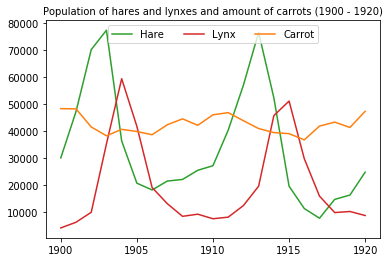

In [ ]:
plt.plot(years, hares, label = 'Hare', color='tab:green')
plt.plot(years, lynxes, label = 'Lynx', color='tab:red')
plt.plot(years, carrots, label = 'Carrot', color='tab:orange')
plt.legend(loc='upper center', ncol = 3)
plt.xticks(years.astype(int)[::5])
plt.title("Population of hares and lynxes and amount of carrots (1900 - 1920)", fontsize=10)
plt.show()

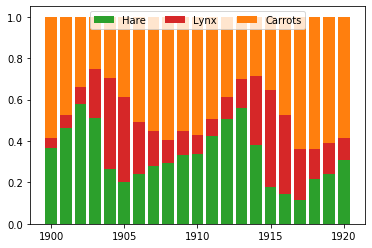

In [ ]:
total = data[:, 1:].sum(axis = 1)
plt.bar(years, hares / total, label = 'Hare', color='tab:green')
plt.bar(years, lynxes / total, label = 'Lynx', bottom = hares / total, color='tab:red')
plt.bar(years, carrots / total, label = 'Carrots', color='tab:orange', bottom = (hares + lynxes) / total)
plt.legend(loc='upper center', ncol = 3)
plt.show()

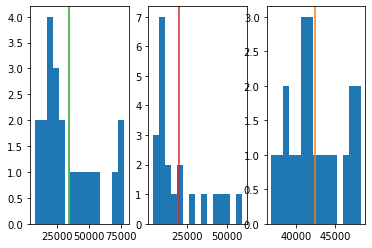

Hares std:  20897.906458089667
Lynxes std:  16254.591536908763
Carrots std:  3322.5062255844787


In [ ]:
fig, ax = plt.subplots(1, 3)
ax[0].hist(hares, bins = 15)
ax[0].axvline(hares.mean(), color='tab:green')
ax[1].hist(lynxes, bins = 15)
ax[1].axvline(lynxes.mean(), color='tab:red')
ax[2].hist(carrots, bins = 15)
ax[2].axvline(carrots.mean(), color='tab:orange')
plt.show()
print("Hares std: ", hares.std())
print("Lynxes std: ", lynxes.std())
print("Carrots std: ", carrots.std())

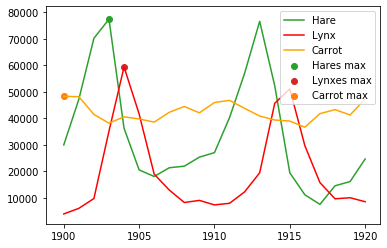

In [ ]:
plt.plot(years, hares, label = 'Hare', color='tab:green')
plt.plot(years, lynxes, label = 'Lynx', c ='red')
plt.plot(years, carrots, label = 'Carrot', c = 'orange')
plt.xticks(years.astype(int)[::5])
plt.scatter(years[np.argmax(hares)], max(hares), color='tab:green', label = 'Hares max')
plt.scatter(years[np.argmax(lynxes)], max(lynxes), color='tab:red', label = 'Lynxes max')
plt.scatter(years[np.argmax(carrots)], max(carrots), color='tab:orange', label = 'Carrot max')
plt.legend(loc='upper right')
plt.show()

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


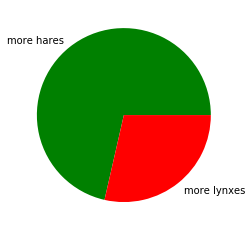

In [ ]:
max_h_l = np.full(len(years), 'H')
max_h_l[np.where(lynxes > hares)] = 'L'
print(list(max_h_l))
print(list(years - 1900))
plt.pie([len(np.where(max_h_l == 'H')[0]), len(np.where(max_h_l == 'L')[0])], colors = ['green', 'red'], labels = ['more hares', 'more lynxes'])
plt.show()

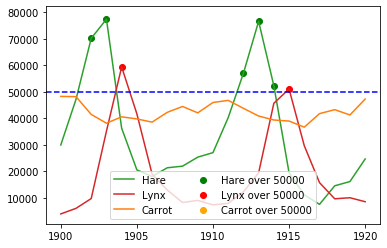

In [ ]:
N = 50000
plt.plot(years, hares, label = 'Hare', color='tab:green')
plt.plot(years, lynxes, label = 'Lynx', color='tab:red')
plt.plot(years, carrots, label = 'Carrot', color='tab:orange')
plt.scatter(years[np.where(hares > N)[0]], hares[np.where(hares > N)[0]], label = 'Hare over ' + str(N), c = 'green')
plt.scatter(years[np.where(lynxes > N)[0]], lynxes[np.where(lynxes > N)[0]], label = 'Lynx over ' + str(N), c = 'red')
plt.scatter(years[np.where(carrots > N)[0]], carrots[np.where(carrots > N)[0]], label = 'Carrot over ' + str(N), c = 'orange')
plt.axhline(N, c = 'blue', ls = '--')
plt.legend(loc='lower center', ncol = 2)
plt.xticks(years.astype(int)[::5])
plt.show()

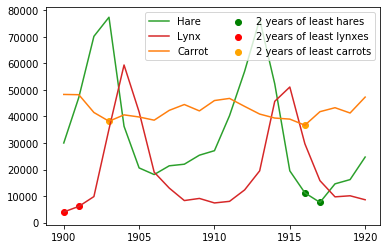

In [ ]:
K = 2
plt.plot(years, hares, label = 'Hare', color='tab:green')
plt.plot(years, lynxes, label = 'Lynx', color='tab:red')
plt.plot(years, carrots, label = 'Carrot', color='tab:orange')
plt.scatter(years[np.argsort(hares)[:K]], hares[np.argsort(hares)[:K]], label = str(K) + ' years of least hares', c = 'green')
plt.scatter(years[np.argsort(lynxes)[:K]], lynxes[np.argsort(lynxes)[:K]], label = str(K) + ' years of least lynxes', c = 'red')
plt.scatter(years[np.argsort(carrots)[:K]], carrots[np.argsort(carrots)[:K]], label = str(K) + ' years of least carrots', c = 'orange')
plt.xticks(years[::5])
plt.legend(ncol = 2)
plt.show()

[     0.  17200.  23000.   7200. -41100. -15700.  -2500.   3300.    600.
   3400.   1700.  13200.  16700.  19600. -24300. -32800.  -8300.  -3600.
   7000.   1600.   8500.]


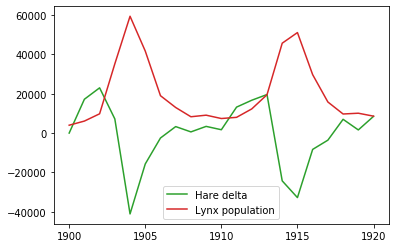

Lynx-hare correlation:  -0.8289727755788596


In [ ]:
diff_hares = np.array([0] + list(np.diff(hares)))
print(diff_hares)
plt.plot(years, diff_hares, label = 'Hare delta', color='tab:green')
plt.plot(years, lynxes, label = 'Lynx population', color='tab:red')
plt.xticks(years[::5])
plt.legend()
plt.show()
print("Lynx-hare correlation: ", np.corrcoef(diff_hares, lynxes)[0, 1])

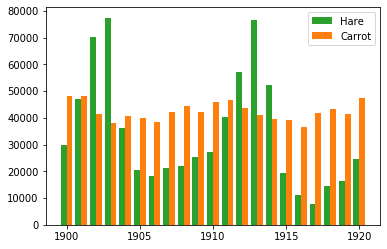

In [ ]:
width = 0.4
fig, ax = plt.subplots()
ax.bar(years - width/2, hares, width, label='Hare', color='tab:green')
ax.bar(years + width/2, carrots, width, label='Carrot', color='tab:orange')
ax.set_xticks(years[::5])
ax.set_xticklabels(years[::5])
ax.legend()
plt.show()

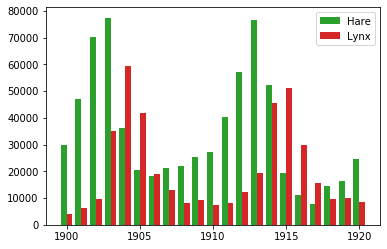

In [ ]:
fig, ax = plt.subplots()
ax.bar(years - width/2, hares, width, label='Hare', color='tab:green')
ax.bar(years + width/2, lynxes, width, label='Lynx', color='tab:red')
ax.set_xticks(years[::5])
ax.set_xticklabels(years[::5])
ax.legend()
plt.show()

In [ ]:
print(np.corrcoef(diff_hares[:-1], lynxes[:-1])[0, 1])

-0.826278672705368


In [ ]:
diff_hares_prognose = np.mean(diff_hares[:-1]) - (np.std(diff_hares[:-1]) / np.std(lynxes[:-1])) * (lynxes[-1] - np.mean(lynxes[:-1])) 
prognose = hares[-2] + diff_hares_prognose
print("Error rate: ", round(abs(prognose - hares[-1]) / hares[-1] * 100, 2), "%")

Error rate:  12.25 %


In [ ]:
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
images = digits.data.reshape(-1, 28, 28)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=784)
X_transformed = pca.fit_transform(digits.data.astype(float))

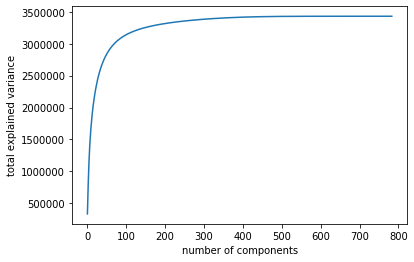

In [ ]:
exp_variances = np.cumsum(pca.explained_variance_)
plt.plot(exp_variances)
plt.xlabel('number of components')
plt.ylabel('total explained variance')
plt.show()

In [ ]:
from bisect import bisect_left
accuracy = np.array([0.99, 0.95, 0.9, 0.85])
l = len(accuracy)
ac_min_comp = np.zeros(l, dtype = int)
exp_var_norm = exp_variances / (exp_variances[-1])
for i in range(l):
    ac_min_comp[i] = bisect_left(exp_var_norm, accuracy[i])
    print("Number of components for ", accuracy[i] * 100, "% of explained variance: ", ac_min_comp[i])

Number of components for  99.0 % of explained variance:  330
Number of components for  95.0 % of explained variance:  153
Number of components for  90.0 % of explained variance:  86
Number of components for  85.0 % of explained variance:  58


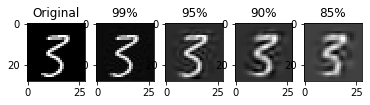

In [ ]:
i = 540
fig, ax = plt.subplots(1, l + 1)
ax[0].imshow(images[i], cmap='gray')
ax[0].set_title('Original')
for j in range(1, l + 1):
    pca = PCA(n_components = ac_min_comp[j - 1])
    X_transformed = pca.fit_transform(digits.data.astype(float))
    X_restored = pca.inverse_transform(X_transformed)
    ax[j].imshow(X_restored[i].reshape(28, 28), cmap='gray')
    ax[j].set_title(str(int(accuracy[j - 1] * 100)) + '%') 
plt.show()